In [5]:
from google.colab import drive
drive.mount('/content/drive')
!pip install netCDF4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00


In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install the netCDF4 library
!pip install netCDF4

import netCDF4 as nc

# Specify the file path
file_path = r"/content/drive/MyDrive/(OMI vs IAGOS)Lab Internship/Data/IAGOS_profile_2022030206242204_L2_3.1.0-ascent.nc4"

# Open the NetCDF file
dataset = nc.Dataset(file_path, mode='r')

# View the file's metadata
print(dataset)

# View all variables in the file along with their units
print("\nVariables in the file with their units:\n")
for var_name in dataset.variables:
    var = dataset.variables[var_name]
    # Attempt to get the units attribute; if not present, display "no units"
    units = var.units if 'units' in var.ncattrs() else "no units"
    print(f"{var_name} (units: {units})")

# If you want to view data for a specific variable, such as 'ozone_concentration'
if 'ozone_concentration' in dataset.variables:
    ozone_var = dataset.variables['ozone_concentration']
    ozone_data = ozone_var[:]
    ozone_units = ozone_var.units if 'units' in ozone_var.ncattrs() else "no units"
    print(f"\nOzone concentration data (units: {ozone_units}):\n", ozone_data)

# Close the file
dataset.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: IAGOS final quality controlled Observational Data L2 – Vertical profiles 2022030206242204
    summary: The IAGOS L2 vertical profiles data product is a subset of the IAGOS L2 time series data product. It contains all in situ observations made by IAGOS instruments (IAGOS-CORE, IAGOS-CARIBIC and IAGOS-MOZAIC) on board of the IAGOS fleet only for the ascending and descending profiles over the airports. Coordinates, timestamp and meteorological variables measured by the aircrart sensors are provided in addition to the observed variables.
The data have been submitted to final quality control (Level 2). New data is usually available from two to six month after acquisition.
Two files are provided for each flight: one for the take-off profile and one for the landing profile. They 

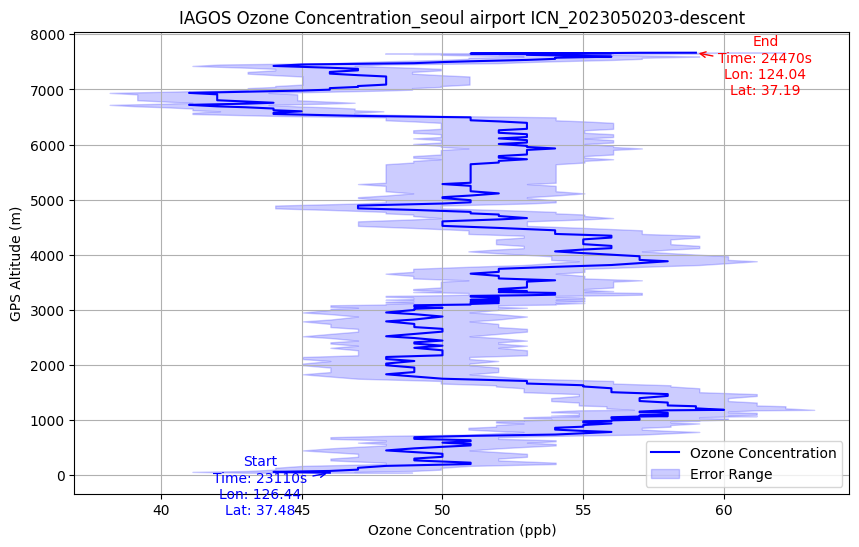

In [9]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# 指定文件路径
file_path = r"/content/drive/MyDrive/(OMI vs IAGOS)Lab Internship/Data/IAGOS_profile_2022030206242204_L2_3.1.0-ascent.nc4"

# 打开 NetCDF 文件
dataset = nc.Dataset(file_path, mode='r')

# 提取臭氧浓度 (O3_P1) 及其验证标记和误差数据
ozone_data = dataset.variables['O3_P1'][:]  # 臭氧浓度 (ppb)
ozone_error = dataset.variables['O3_P1_error'][:]  # 臭氧浓度误差 (ppb)
ozone_flag = dataset.variables['O3_P1_validity_flag'][:]  # 臭氧浓度的验证标记

# 提取 GPS 高度、时间、经度和纬度
gps_alt = dataset.variables['gps_alt_AC'][:]  # GPS 高度 (米)
time_data = dataset.variables['UTC_time'][:]  # 时间 (秒)
lon_data = dataset.variables['lon'][:]  # 经度 (度)
lat_data = dataset.variables['lat'][:]  # 纬度 (度)

# 过滤掉验证标签非0的点，保留验证标记为0的数据
valid_idx = np.where(ozone_flag == 0)  # 只保留有效点

# 提取有效的臭氧浓度、误差、GPS高度、时间、经度和纬度
ozone_valid = ozone_data[valid_idx]
ozone_error_valid = ozone_error[valid_idx]
gps_alt_valid = gps_alt[valid_idx]
time_valid = time_data[valid_idx]
lon_valid = lon_data[valid_idx]
lat_valid = lat_data[valid_idx]

# 绘制臭氧浓度随GPS高度的垂直剖面，并包含误差范围
plt.figure(figsize=(10, 6))

# 绘制臭氧浓度曲线
plt.plot(ozone_valid, gps_alt_valid, label='Ozone Concentration', color='blue')

# 绘制误差范围（使用 fill_between 填充上下限）
plt.fill_betweenx(gps_alt_valid, ozone_valid - ozone_error_valid, ozone_valid + ozone_error_valid,
                  color='blue', alpha=0.2, label='Error Range')

plt.xlabel('Ozone Concentration (ppb)')
plt.ylabel('GPS Altitude (m)')
plt.title('IAGOS Ozone Concentration_seoul airport ICN_2023050203-descent')

# 标记起始点的时间、经度和纬度
plt.annotate(f'Start\nTime: {time_valid[0]:.0f}s\nLon: {lon_valid[0]:.2f}\nLat: {lat_valid[0]:.2f}',
             (ozone_valid[0], gps_alt_valid[0]),
             textcoords="offset points", xytext=(-50,-30), ha='center', fontsize=10, color='blue', arrowprops=dict(arrowstyle="->", color='blue'))

# 标记结束点的时间、经度和纬度
plt.annotate(f'End\nTime: {time_valid[-1]:.0f}s\nLon: {lon_valid[-1]:.2f}\nLat: {lat_valid[-1]:.2f}',
             (ozone_valid[-1], gps_alt_valid[-1]),
             textcoords="offset points", xytext=(50,-30), ha='center', fontsize=10, color='red', arrowprops=dict(arrowstyle="->", color='red'))

plt.grid(True)
plt.legend()
plt.show()

# 关闭 NetCDF 文件
dataset.close()
